# Classification study

## In this notebook created comparision between 5 models for classification on artificial data.
Model are used:
- Linear Regression
- Linear Regression with 5 degree polynomial feature engineering 
- Decision Tree 
- Decision Tree with 5 degree polynomial feature engineering 
- Optimal Decision Tree with choosen by GridSearchCV best criterion and depth of tree

### Final metrics are score by cross-validation with 10 folds, standart deviation of this and test score 

In [1]:
import numpy as np
from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d #3d plots
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

## Get data

Create artificial dataset ([try others](https://scikit-learn.org/stable/modules/classes.html#samples-generator))

In [3]:
X, y = datasets.make_classification(n_samples=1000, n_features=2,
                                    n_informative=2, n_redundant=0, 
                                    n_repeated=0,
                                    n_classes=4,
                                    n_clusters_per_class=1,
                                    weights=None,
                                    flip_y=0.01,
                                    class_sep=1.0,
                                    hypercube=True,
                                    shift=1.0,
                                    scale=1.0,
                                    shuffle=False,
                                    random_state=1337)

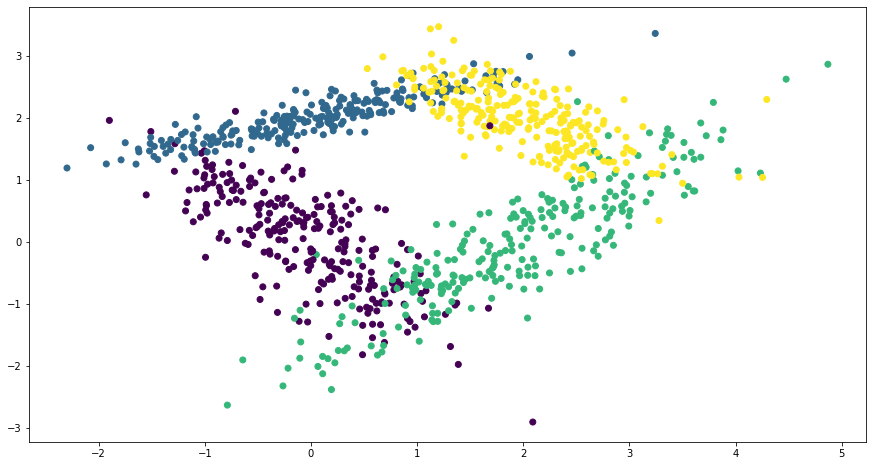

In [4]:
plt.scatter(X[:,0], X[:,1], c = y)

In [5]:
print(f'Data has proportion \
      {y[y==0].shape[0]/y.shape[0]*100}/{y[y==1].shape[0]/y.shape[0]*100}/{y[y==2].shape[0]/y.shape[0]*100}/{y[y==3].shape[0]/y.shape[0]*100} % \
      of each class')

Data has proportion       25.0/25.0/25.0/25.0 %       of each class


That means that data is balanced

Text(0.5, 0, 'y')

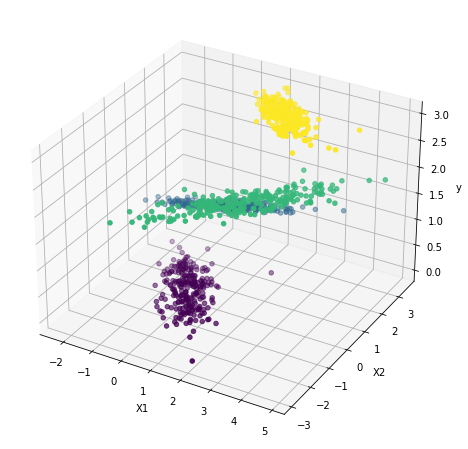

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], y, c = y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

Text(0.5, 0, 'y[y==0]')

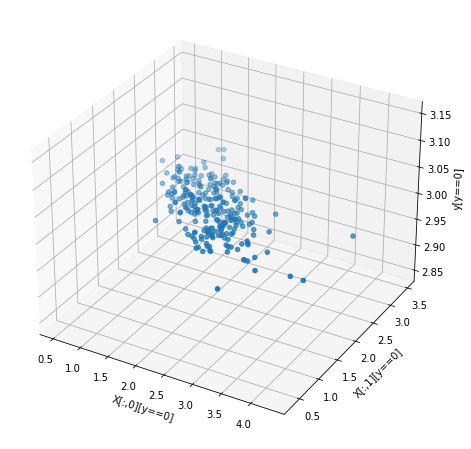

In [7]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0][y==3], X[:,1][y==3], y[y==3])
ax.set_xlabel('X[:,0][y==0]')
ax.set_ylabel('X[:,1][y==0]')
ax.set_zlabel('y[y==0]')

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
results = {}
resultsCV = {}

In [10]:
def plot_clf(model, X, y, resolution = 100, ax=None, cmap='rainbow'):
    '''
    Visualize 2d decsision boundary of any sklearn-compatible classifier
    '''
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
                zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # evaluate grid of points
    xx, yy = np.meshgrid(np.linspace(*xlim, num=resolution),
                         np.linspace(*ylim, num=resolution))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    score = metrics.accuracy_score(y, model.predict(X))

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, 
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    plt.title(type(model).__name__+'\nScore = %.3f' %score)


## Logistic regression

Try the [simplest](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) linear classifier

convergence after 30 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


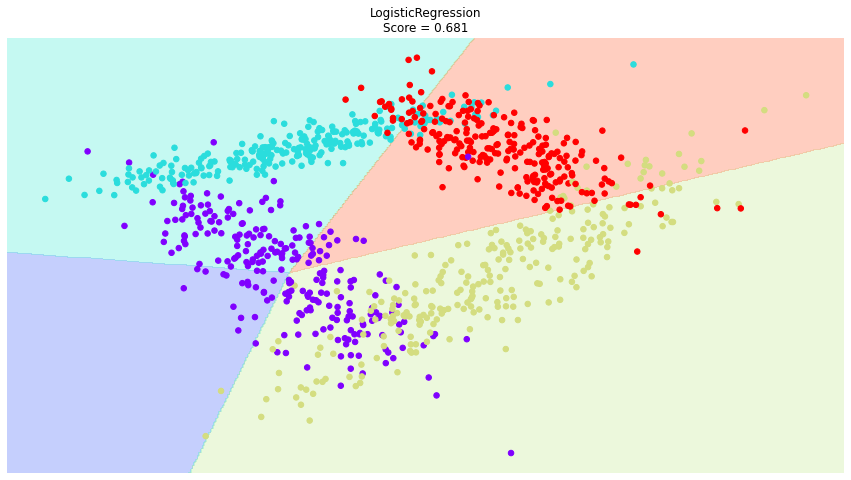

In [11]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

logregmodel = linear_model.LogisticRegression(solver = 'sag',
                                            max_iter = 1000000, 
                                            verbose = 1, 
                                            fit_intercept=False)

logregmodel.fit(X_train,y_train)
results['LogReg'] = logregmodel.score(X_test,y_test)
plot_clf(logregmodel, X, y, resolution = 500)

In [12]:
scores = cross_val_score(logregmodel, X_train, y_train, cv=10)
logregmodel_res = {'CV_mean':scores.mean(), 'CV_std':scores.std(), 'Test':logregmodel.score(X_test,y_test)}
logregmodel_res

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


convergence after 37 epochs took 0 seconds
convergence after 33 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 33 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 27 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


{'CV_mean': 0.672, 'CV_std': 0.018086213288334065, 'Test': 0.692}

In [13]:
resultsCV['LogReg'] = logregmodel_res

Text(0.5, 0, 'y')

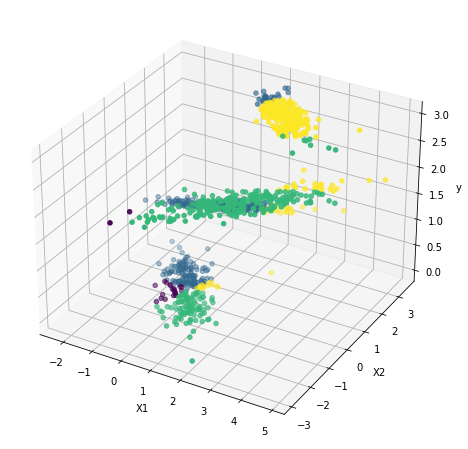

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], y, c = logregmodel.predict(X))
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

##Augment data with polynomial features

Add [polynomial features](https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features) is the simpliest way to make classifier non-linear.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [16]:
DEGREE = 5
polynomial_features = PolynomialFeatures(degree = DEGREE) # try to overfit it!

[SKLearn Pipelines](https://scikit-learn.org/stable/modules/compose.html#pipelines-and-composite-estimators) is a great way to combine the whole process of transforming, normalizaing, modelling and evaluating in one managable, convenient entitiy.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8542 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished


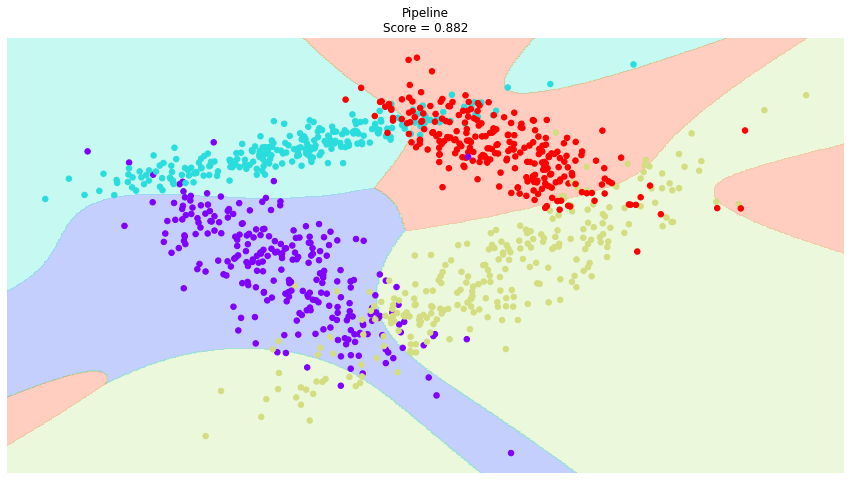

In [17]:
lr_5_degree = Pipeline([("polynomial_features", polynomial_features), # augment data
                       ("estimator", logregmodel)]) # apply linear regression

lr_5_degree.fit(X,y) # you can add any preprocessing to pipeline and treat it as a single model
results['LogReg_'+str(DEGREE)] = lr_5_degree.score(X_test,y_test)

plot_clf(lr_5_degree, X, y, resolution = 500)

In [18]:
scores = cross_val_score(lr_5_degree, X_train, y_train, cv=10)
lr_5_degree_res = {'CV_mean':scores.mean(), 'CV_std':scores.std(), 'Test':lr_5_degree.score(X_test,y_test)}
resultsCV[f'LogReg_{DEGREE}'] = lr_5_degree_res

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8848 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8728 epochs took 3 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8844 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8827 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 7380 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8841 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8871 epochs took 3 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8834 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8885 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8877 epochs took 3 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished


Text(0.5, 0, 'y')

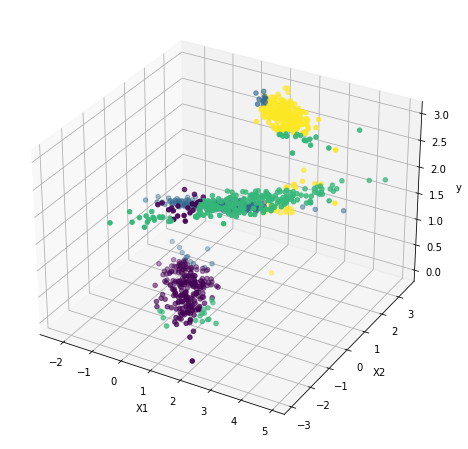

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], y, c = lr_5_degree.predict(X))
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

## [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

Find more examples and practical tips in [user guide](https://scikit-learn.org/stable/modules/tree.html#tree).

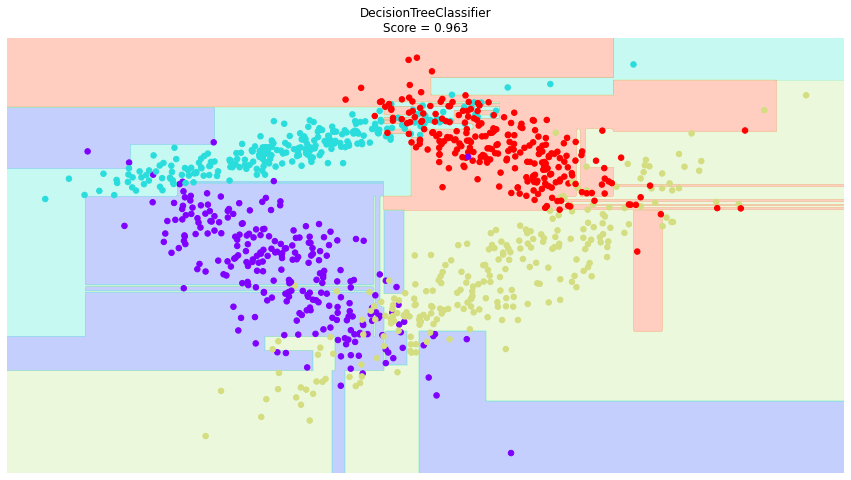

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtreemodel = DecisionTreeClassifier(criterion='gini', 
                               splitter='best', 
                               max_depth=None, 
                               min_samples_split=2, 
                               min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, 
                               max_features=None, 
                               random_state=None, 
                               max_leaf_nodes=None, 
                               min_impurity_decrease=0.0, 
                               min_impurity_split=None, 
                               class_weight=None)
dtreemodel.fit(X_train, y_train)
results['Tree'] = dtreemodel.score(X_test,y_test)

plot_clf(dtreemodel,X,y,resolution = 500)

In [21]:
scores = cross_val_score(dtreemodel, X_train, y_train, cv=10)
dtreemodel_res = {'CV_mean':scores.mean(), 'CV_std':scores.std(), 'Test':dtreemodel.score(X_test,y_test)}
resultsCV['Decision tree'] = dtreemodel_res

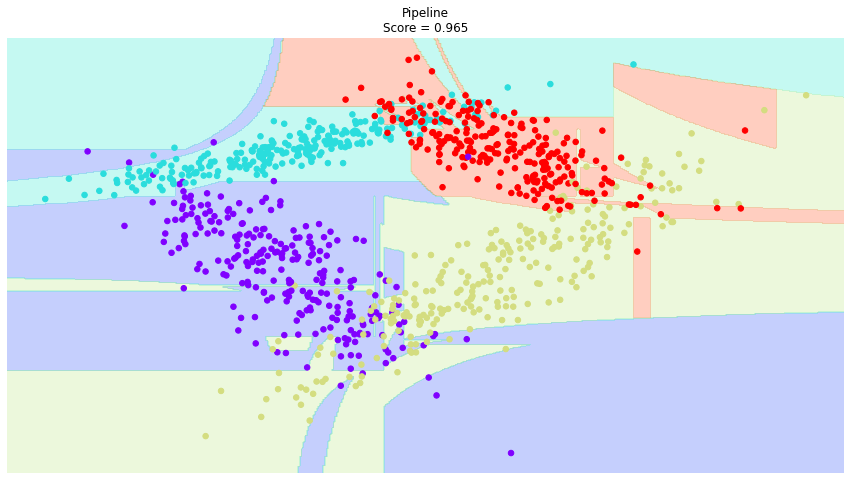

In [22]:
estimator = dtreemodel

dt_5_degree = Pipeline([("polynomial_features", polynomial_features),("estimator", estimator)]) 


dt_5_degree.fit(X_train, y_train)
results['Tree_'+str(DEGREE)] = dt_5_degree.score(X_test,y_test)

plot_clf(dt_5_degree, X, y, 500)

In [23]:
scores = cross_val_score(dt_5_degree, X_train, y_train, cv=10)
dt_5_degree_res = {'CV_mean':scores.mean(), 'CV_std':scores.std(), 'Test':dt_5_degree.score(X_test,y_test)}
resultsCV[f'Decision tree_{DEGREE}'] = dt_5_degree_res

### Decision tree visualization

Visualize single decision tree structure

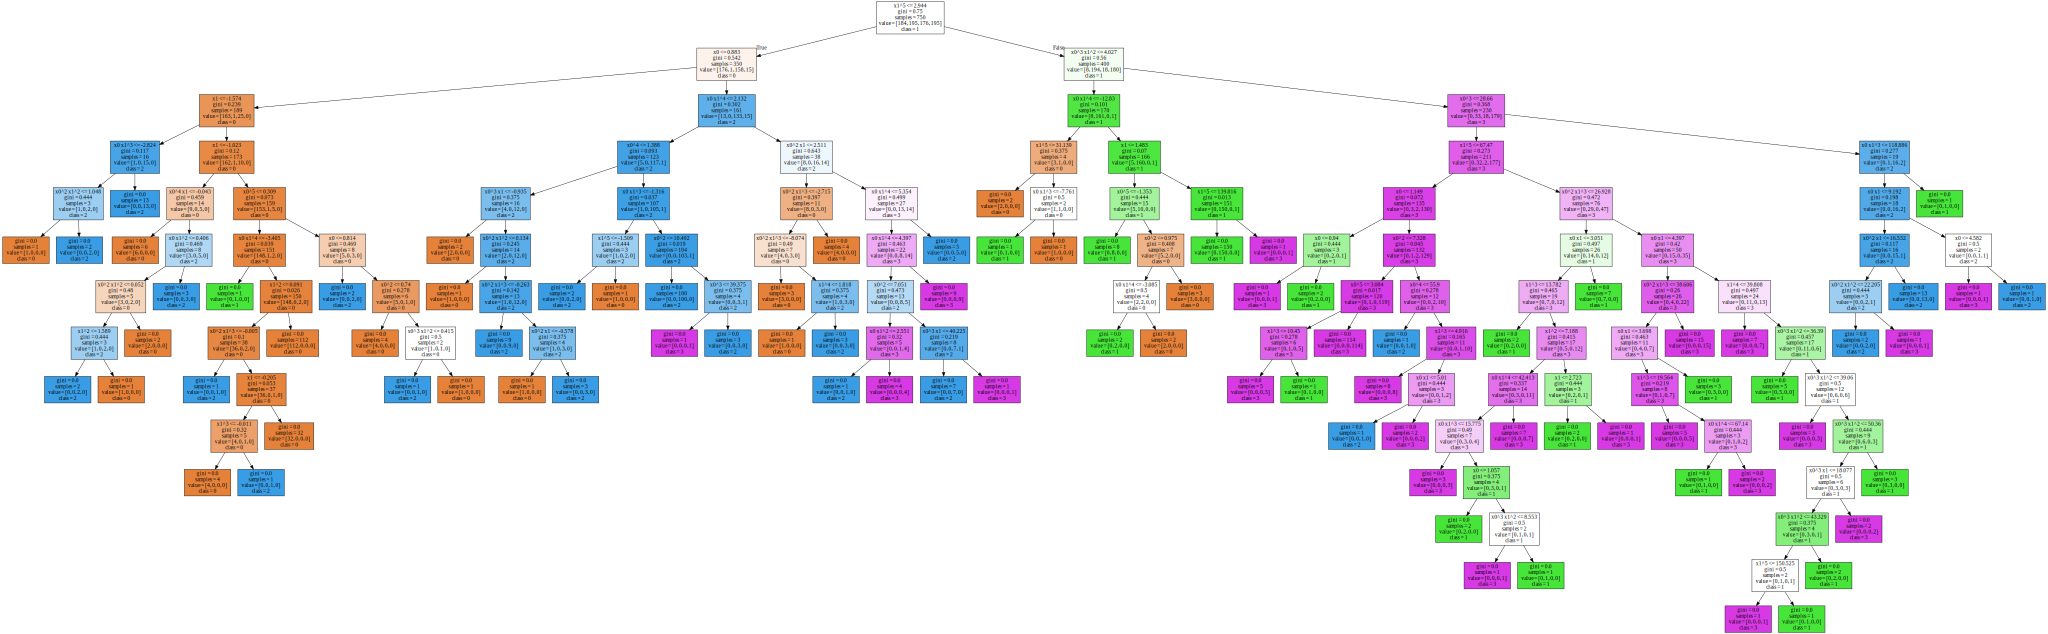

In [24]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(dtreemodel, out_file=None,
                                    feature_names=polynomial_features.get_feature_names(), 
                                    class_names=[str(n) for n in np.unique(y)],
                                    filled = True))
display(SVG(graph.pipe(format='svg')))

### Feature importance

Estimate importance of features using tree-specific methods. Find more model-agnostic methods in [Feature Selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) section.

(11.0, 21.0)

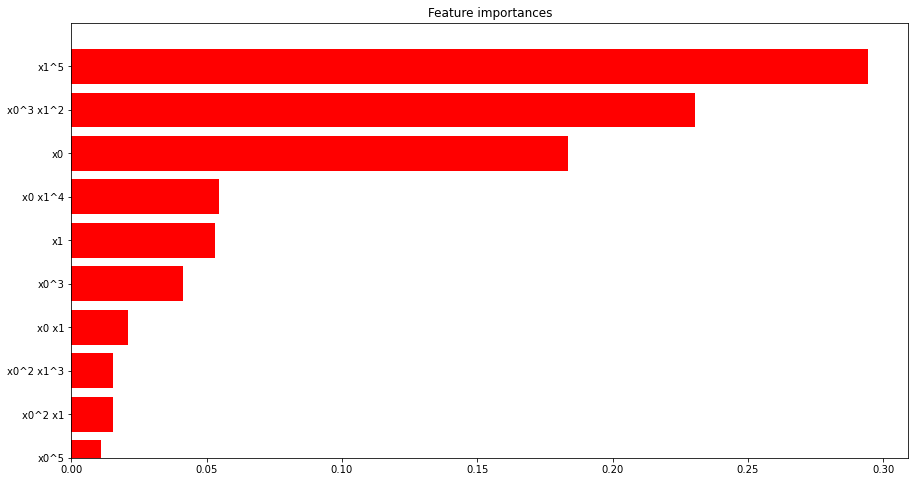

In [25]:
n_top_features = 10
labels = polynomial_features.get_feature_names()
importances = dt_5_degree['estimator'].feature_importances_
indices = np.argsort(importances)

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.barh(range(len(labels)), importances[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(len(labels)), np.array(labels)[indices])
plt.ylim([len(labels) - n_top_features, len(labels)])

### Study a parameter

Change a hyper-parameter to study its impact to model.

Try to study polynomial degree and other models parameters in the similar way



Wall time: 35.9 ms


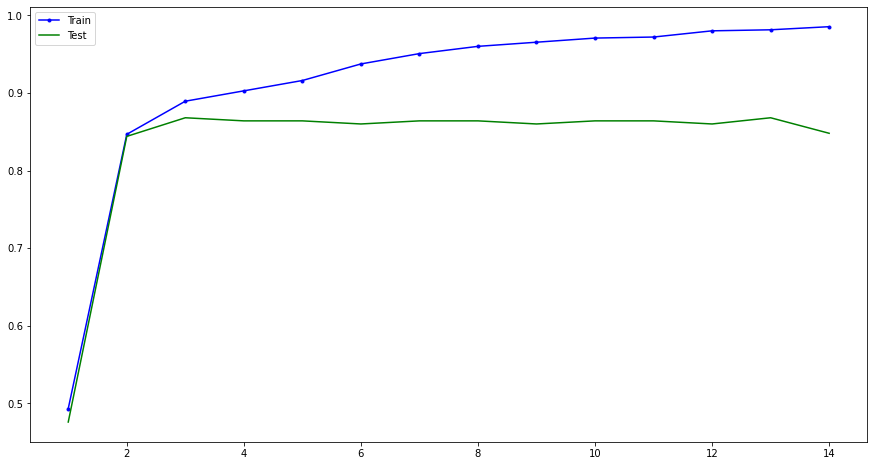

In [26]:
%%time
depths = range(1,15)
res_train = []
res_test = []

for depth in depths:
  model = DecisionTreeClassifier(max_depth=depth)
  model.fit(X_train, y_train)
  
  train_score = model.score(X_train, y_train)
  res_train.append(train_score)
  test_score = model.score(X_test, y_test)
  res_test.append(test_score)

plt.plot(depths, res_train, 'b.-', label = 'Train')
plt.plot(depths, res_test, 'g-', label = 'Test')
plt.legend()

# Using of GridSearchCV for choosing best criterion and depth of tree

In [27]:
# get params that can be tuned
estimator.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [28]:
from sklearn.model_selection import GridSearchCV
criterion = ['gini', 'entropy']

params = {'criterion': criterion, 'max_depth': depths}

clf_GS = GridSearchCV(dtreemodel, params, cv=10)
clf_GS.fit(X_train, y_train)
print('Best criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])
#print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best criterion: entropy
Best max_depth: 4


In [29]:
clf_GS.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## And we get an answer, now these parameters above are the best hyperparameter for this algorithm for this data

In [30]:
results['Tree_'+str(clf_GS.best_estimator_.get_params()['criterion'])+str(clf_GS.best_estimator_.get_params()['max_depth'])] = clf_GS.score(X_test, y_test)

In [31]:
scores = cross_val_score(clf_GS, X_train, y_train, cv=10)
clf_GS_res = {'CV_mean':scores.mean(), 'CV_std':scores.std(), 'Test':clf_GS.score(X_test, y_test)}
resultsCV['Opt Tree'] = clf_GS_res

In [32]:
results.keys()

dict_keys(['LogReg', 'LogReg_5', 'Tree', 'Tree_5', 'Tree_entropy4'])

In [33]:
import pandas as pd
results1 = pd.DataFrame(results, index=['Score'])
results1.T.style.highlight_max()

,Score
LogReg,0.692000
LogReg_5,0.888000
Tree,0.852000
Tree_5,0.860000
Tree_entropy4,0.876000


In [35]:
resultCV = pd.DataFrame(resultsCV)
resultCV.T.style.highlight_max()

,CV_mean,CV_std,Test
LogReg,0.672000,0.018086,0.692000
LogReg_5,0.864000,0.036661,0.888000
Decision tree,0.844000,0.031581,0.852000
Decision tree_5,0.860000,0.021705,0.860000
Opt Tree,0.857333,0.043019,0.876000


In this case Linear Regression with 5 degree polynomial features worked better 